In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Predictions from ML model

In [11]:
predicted_births = np.array([
    15534, 15587, 16713, 17706,
    16886, 14559, 12507, 12675,
    15314, 18075, 17636, 14197
])

In [12]:
# since the data concerning parental benefit recipients is only available in yearly format
# we will have to convert our quartely figures for predicted births to yearly

yearly_predicted_births = np.array(
    [sum(row) for row in predicted_births.reshape(-1, 4)]
)

## Data from C.S.O.

In [13]:
# payment is €245 per week for total of 26 weeks
mat_benefit = 245

# payment is €245per week for total of 2 weeks
pat_benefit = 245

In [18]:
# number of maternity benefit recipients 2009 - 2018

mat_benefit_nums = np.array([48367, 48806, 48827, 45415, 45491,
                             44555, 44740, 41646, 45621, 41429
                            ])

# number of paternity benefit recipients 2016 - 2019
# this scheme was first introduced in 2016

pat_benefit_nums = np.array([4580, 25753, 24004, 27020])

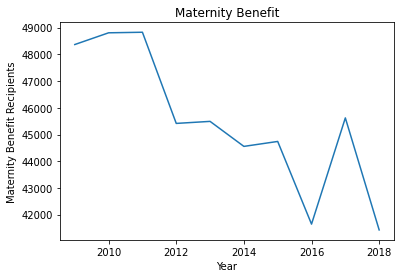

In [82]:
# let's do  quick plot of the no. of recipients against year

x = np.arange(2009, 2019)

plt.plot(x, mat_benefit_nums)
plt.title("Maternity Benefit")
plt.xlabel("Year")
plt.ylabel("Maternity Benefit Recipients")
plt.savefig("plots/mat_ben_nums", bbox_inches='tight')

Here we see that the general trend is towards a decline in the number of recipients of maternity benefit.

## From BDM dataset

In [15]:
#official figures from 2009 - 2018
actual_births_m = np.array([74928, 74976, 74650, 72225, 68930,
                            67432, 65909, 63897, 62053, 61016
                           ])

# official figures from 2016 - 2019
actual_births_p = np.array([63897, 62053, 61016, 59796])

## Maternity benefit

In [61]:
# percentage of births where maternity benefit is paid

mat_percent = mat_benefit_nums / (actual_births_m / 100)
mat_percent

array([64.55130258, 65.09549723, 65.40790355, 62.87988924, 65.99593791,
       66.07397082, 67.88147294, 65.17676886, 73.51941083, 67.89858398])

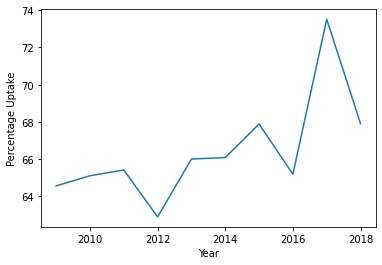

In [83]:
plt.plot(x, mat_percent)
plt.xlabel("Year")
plt.ylabel("Percentage Uptake")
plt.savefig("plots/mat_ben_perc", bbox_inches='tight')

Here we see the opposite trend to the plot in $\S2$ above. This is because although the number of recipients is decreasing, as a percentage of babies born it is increasing. The number of babies born, however, is decreasing as shown in previous notebooks and in the report.

Now we'll try apply our ML algorithm to the data.

### Machine Learning

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [37]:
len(x)

10

In [39]:
# creating our dependent and independent variables

X = x.reshape(-1,1)
y = mat_percent

Training score:  0.3971739472294502
Testing score:  -0.06591924696162987


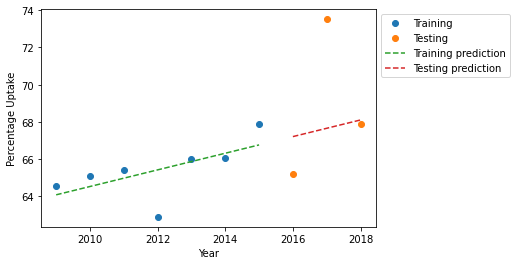

In [84]:
# let's set up the regression algorithm

regressor = LinearRegression()

# now let's split the data

X_train, X_test = X[:7], X[7:]
y_train, y_test = y[:7], y[7:]

# and perform our regression on the training data

regressor.fit(X_train, y_train)

# now we can make some preictions using the generated model

y_predict = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

# we can score our predictions

train_score = r2_score(y_train, y_pred_train)
test_score = r2_score(y_test, y_predict)

print("Training score: ", train_score)
print("Testing score: ", test_score)

# and finally plot our results

plt.plot(X[:7], y_train, 'o', label="Training")
plt.plot(X[7:], y_test, 'o', label="Testing")

plt.plot(X[:7], y_pred_train, '--', label="Training prediction")
plt.plot(X[7:], y_predict, '--', label="Testing prediction")

plt.legend(bbox_to_anchor=(1, 1))

plt.ylabel("Percentage Uptake")
plt.xlabel("Year")
plt.savefig("plots/mat_ben_ML", bbox_inches='tight')

In [48]:
# here we are making our predictions for the future percentage uptake

regressor.predict(np.arange(2020, 2025).reshape(-1,1))

array([68.99385135, 69.44154752, 69.88924368, 70.33693985, 70.78463601])

Because of the low number and large variance of the data points the machine learning algorithm had a hard time giving good results here. Therefore I decided to use the regular linear regression function available in the `scipy.optimize` library for a "second opinion", although since both are performing linear regression we shouldn't expect anything more than a small change in the predicted values.\
Here I simply define a function for my curve, in this case a straight line, and then I pass that function allong with my x and y data arrays to the `curve_fit` function and it provides me with the optimised parameters, slope and intercept, for my line of best fit.

### Scipy curve fitting

In [24]:
def line(x, m, b):
    # equation of a straight line
    return m*x + b

In [87]:
# returns our optomised parameters
popt, pcov = curve_fit(line, x, y)

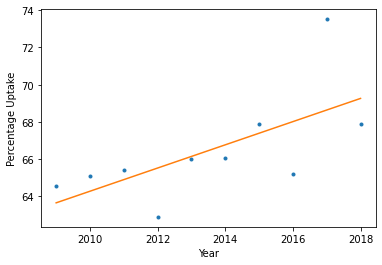

In [88]:
# plotting the results using those optimised parameters

plt.plot(x, y, '.')
plt.plot(x, line(x, *popt))
plt.xlabel("Year")
plt.ylabel("Percentage Uptake")
plt.savefig("plots/mat_ben_fit", bbox_inches='tight')

### Predictions

In [28]:
# here we are making our predictions for future percentage uptake

predictions = np.array([line(i, *popt) for i in range(2020, 2025)])

In [29]:
predictions

array([70.50643893, 71.1308028 , 71.75516667, 72.37953054, 73.00389441])

Comparing to the ML model above we can see that there isn't a huge difference in the final predicted values as we expected.

In [52]:
# now we can calculate the predicted total payment 
# for maternity benefit for the years 2022 - 2024

benefit_per_baby = 245 * 26

uptake = yearly_predicted_births * (predictions[2:5]/100)
uptake.astype(int)

array([47028, 40986, 47614])

In [53]:
# now we can calculate the total amount in euros to be paid for the scheme

amount = benefit_per_baby * uptake
amount

array([2.99570502e+08, 2.61083093e+08, 3.03305002e+08])

In [54]:
# amount in millions of euros
np.round(amount/1e6, 3)

array([299.571, 261.083, 303.305])

## Paternity benefit

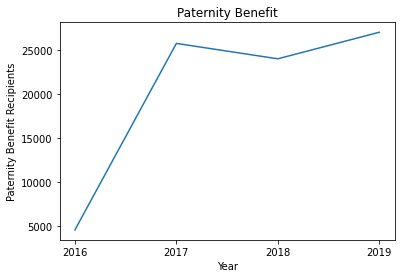

In [89]:
# let's plot the number of recipients of paternity benefit against year

plt.plot(['2016', '2017', '2018', '2019'], pat_benefit_nums)
plt.title("Paternity Benefit")
plt.xlabel("Year")
plt.ylabel("Paternity Benefit Recipients")
plt.savefig("plots/pat_ben_nums", bbox_inches='tight')

In [63]:
# and now calculate that as a percentage of total births for those years

pat_percent = pat_benefit_nums / (actual_births_p / 100)
pat_percent

array([ 7.16778566, 41.50161958, 39.34050085, 45.18696903])

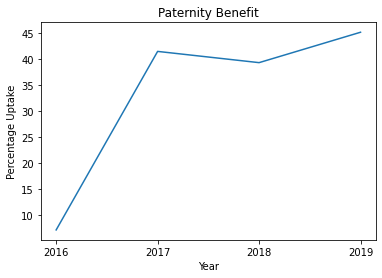

In [90]:
plt.plot(['2016', '2017', '2018', '2019'], pat_percent)
plt.title("Paternity Benefit")
plt.xlabel("Year")
plt.ylabel("Percentage Uptake")
plt.savefig("plots/pat_ben_perc", bbox_inches='tight')

Here I will only use the `curve_fit` function to perform my analysis as 3 data points simply isn't suitable for ML.

### Scipy curve fitting

In [74]:
X_p = np.array([2016, 2017, 2018, 2019])

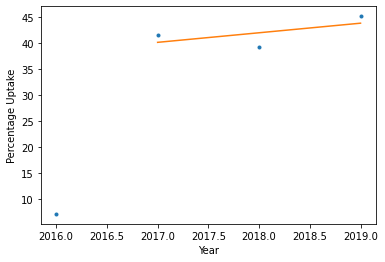

In [91]:
popt, pcov = curve_fit(line, X_p[1:], pat_percent[1:])

plt.plot(X_p, pat_percent, '.')
plt.plot(X_p[1:], line(X_p[1:], *popt))

plt.xlabel("Year")
plt.ylabel("Percentage Uptake")
plt.savefig("plots/pat_ben_fit", bbox_inches='tight')

Here I omitted 2016 from the fitting as it was the first year the programme was introduced and the uptake was very low.

### Predictions

In [76]:
# here we'll make some predictions based on the above fit.

p_predictions = np.array([line(i, *popt) for i in range(2020, 2025)])
p_predictions

array([45.69504593, 47.53772065, 49.38039538, 51.2230701 , 53.06574482])

In [78]:
# now we can calculate the predicted total payment 
# for paternity benefit for the years 2022 - 2024

p_benefit_per_baby = 245 * 2

p_uptake = yearly_predicted_births * (p_predictions[2:5]/100)
p_uptake.astype(int)

array([32363, 29006, 34610])

In [79]:
# and calculate the total amount in euros for the scheme

p_amount = p_benefit_per_baby * p_uptake
p_amount

array([15858316.4538645 , 14212983.07364346, 16959164.64307275])

In [80]:
# amount in millions of euros
np.round(p_amount/1e6, 3)

array([15.858, 14.213, 16.959])

## Total

In [81]:
# total cost for both programmes in millions of euros
np.round(amount/1e6, 3) + np.round(p_amount/1e6, 3)

array([315.429, 275.296, 320.264])